<h2>DRILL: Prepare the Data</h2>

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

-  Propertycrime=α+Population+Population^2+Murder+Robbery


In [165]:
#importing modules and potential modules
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import random
import nltk
from sklearn.model_selection import train_test_split
from sklearn import linear_model


In [166]:
#importing the crime dataset
data = pd.read_csv('https://raw.githubusercontent.com/GenTaylor/Unit2-SupervisedLearning/master/crimedataframemlr.csv')

In [167]:
data.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


<b>Data Cleaning</b>

In [168]:
#Find null values
print(data.isnull().sum())


#revised rape and arson 3 are the only ones with null values, and since I'm not using them I'm going to ignore for now. 

City                                        0
Population                                  0
Violent crime                               0
Murder and\nnonnegligent\nmanslaughter      0
Rape\n(revised\ndefinition)1              348
Rape\n(legacy\ndefinition)2                 0
Robbery                                     0
Aggravated\nassault                         0
Property\ncrime                             0
Burglary                                    0
Larceny-\ntheft                             0
Motor\nvehicle\ntheft                       0
Arson3                                    161
dtype: int64


In [169]:
#changing column names
data_cols= ['City', 'Population', 'Violent_Crime', 'Murder', 'Rape1', 'Rape2', 
            'Robbery', 'Aggravated_Assault', 'Property', 'Burglary', 
            'Larceny_Theft', 'Motor_Vehicle_Theft', 'Arson3']
data.columns = data_cols
data.columns

Index(['City', 'Population', 'Violent_Crime', 'Murder', 'Rape1', 'Rape2',
       'Robbery', 'Aggravated_Assault', 'Property', 'Burglary',
       'Larceny_Theft', 'Motor_Vehicle_Theft', 'Arson3'],
      dtype='object')

In [170]:
#checking data types
data.dtypes

City                    object
Population               int64
Violent_Crime            int64
Murder                   int64
Rape1                  float64
Rape2                    int64
Robbery                  int64
Aggravated_Assault       int64
Property                 int64
Burglary                 int64
Larceny_Theft            int64
Motor_Vehicle_Theft      int64
Arson3                 float64
dtype: object

<b>The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. </b>

In [171]:
#Create a population^2 column

data['Population2'] = data['Population']**2
data.head()

,City,Population,Violent_Crime,Murder,Rape1,Rape2,Robbery,Aggravated_Assault,Property,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson3,Population2
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0,3463321
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0,6640929
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0,8099716
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN,9595377936
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN,40806544


In [172]:
#Robbery and Murder are currently continuous variables. 
#For this model, please use these variables to create categorical 
#features where values greater than 0 are coded 1, 
#and values equal to 0 are coded 0.

#categorical feature
onecat = 1


In [173]:
#Robbery
data['RobberyCat'] = np.where(data['Robbery'] < zerocat, 0, 1)

#Murder
data['MurderCat'] = np.where(data['Murder'] < zerocat, 0, 1)

In [174]:
data.head()

,City,Population,Violent_Crime,Murder,Rape1,Rape2,Robbery,Aggravated_Assault,Property,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson3,Population2,RobberyCat,MurderCat
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0,3463321,1,1
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0,6640929,1,1
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0,8099716,1,1
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN,9595377936,1,1
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN,40806544,1,1


In [175]:
#set X and Y
X = data[['Population','Population2','Murder','Robbery']]
Y = data['Property'].values.reshape(-1, 1)

In [176]:
#regression?

regr = linear_model.LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [177]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coefficients: 
 [[ 1.59234099e-02 -1.01045767e-09  1.17559526e+02  2.09186042e+00]]

Intercept: 
 [24.1435902]

R-squared:
0.9987417422426106


<b>Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.</b>

In [178]:
data.describe()

,Population,Violent_Crime,Murder,Rape1,Rape2,Robbery,Aggravated_Assault,Property,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson3,Population2,RobberyCat,MurderCat
count,3.480000e+02,348.000000,348.000000,0.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000,3.480000e+02,348.0,348.0
mean,4.003763e+04,201.594828,1.566092,NaN,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658,2.035547e+11,1.0,1.0
std,4.500374e+05,2815.268504,18.303673,NaN,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411,3.778876e+12,0.0,0.0
min,5.260000e+02,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.766760e+05,1.0,1.0
25%,3.003000e+03,2.000000,0.000000,NaN,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000,9.018117e+06,1.0,1.0
50%,7.233500e+03,6.000000,0.000000,NaN,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000,5.232568e+07,1.0,1.0
75%,1.842750e+04,22.000000,0.000000,NaN,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000,3.397536e+08,1.0,1.0
max,8.396126e+06,52384.000000,335.000000,NaN,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000,7.049493e+13,1.0,1.0


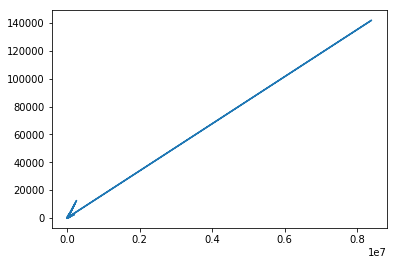

In [186]:
plt.plot(data['Population'], data['Property'])


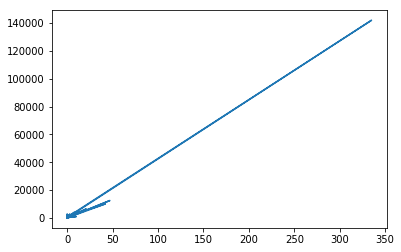

In [187]:
plt.plot(data['Murder'], data['Property'])

I did see some anomalous cases but I am not sure if they should be changed becaause of the nature of the data. 